In [1]:
#import libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from tensorflow.keras import layers, callbacks
from tensorflow import keras
from imblearn.over_sampling import RandomOverSampler

In [2]:
#read csv file
df = pd.read_csv('heart_2020.csv')

In [3]:
#Check dataset
print("The Shape:",df.shape)
print("The NULL values:\n",df.isnull().sum())
print("Number of duplicated values",df.duplicated().sum())

The Shape: (319795, 18)
The NULL values:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
Number of duplicated values 18078


In [4]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

In [5]:
#descriptive statistics
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [6]:
#summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

<Axes: title={'center': 'HeartDisease'}, xlabel='HeartDisease', ylabel='count'>

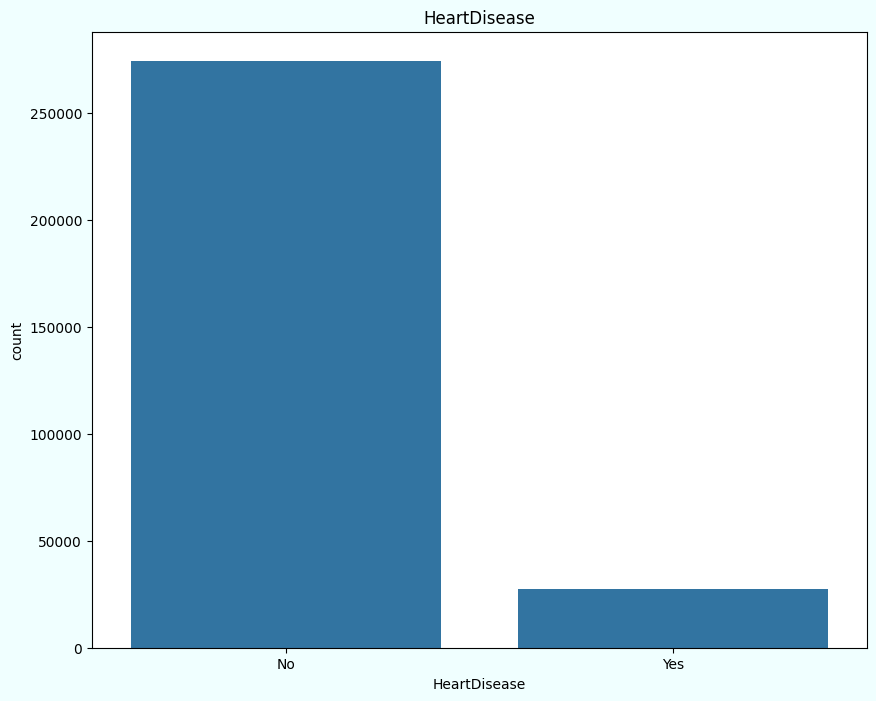

In [7]:
#HeartDisease
plt.figure(figsize=(10,8), facecolor='azure')
plt.title('HeartDisease')
sns.countplot(x='HeartDisease', data=df)

In [8]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

In [9]:
# apply Label encoder to df_categorical
enc= LabelEncoder()
df_categorical = df_categorical.apply(enc.fit_transform)
df.drop(df_categorical.columns, axis=1, inplace=True)
df = pd.concat([df_categorical, df], axis=1)


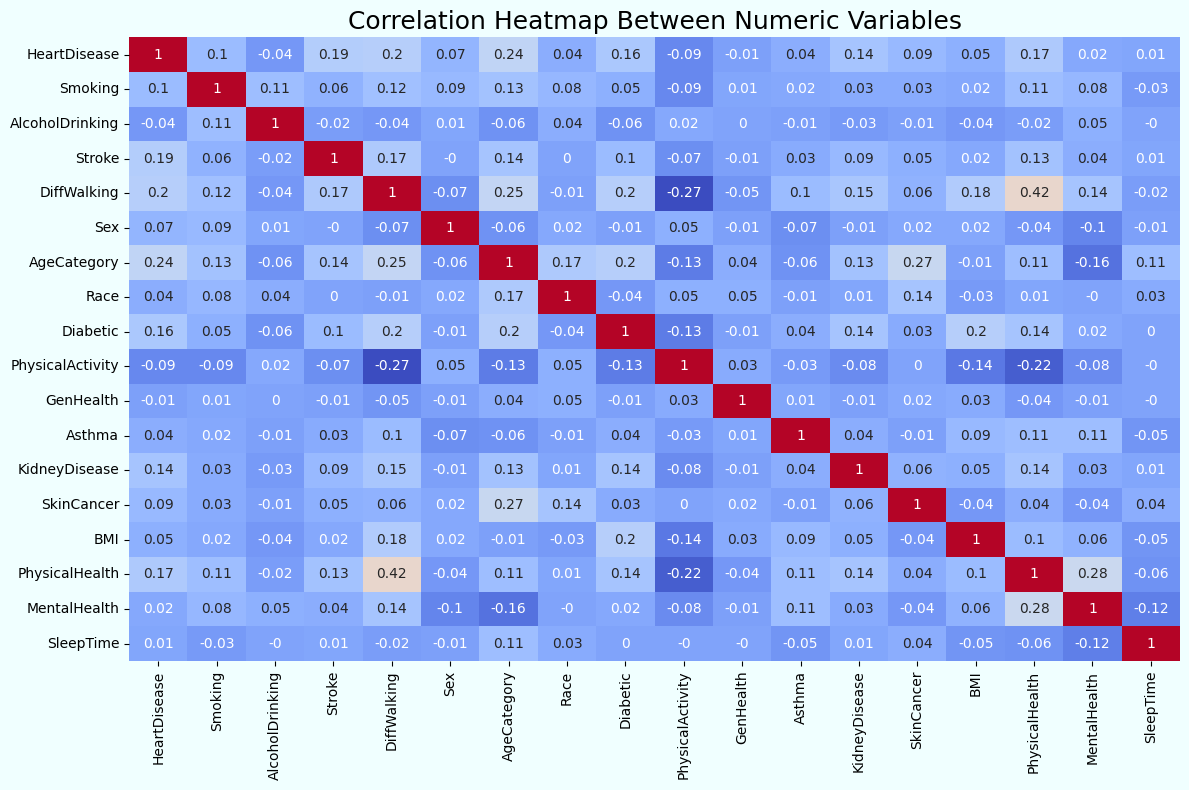

In [10]:
# visualize correlations between all features
plt.figure(figsize=(12,8),facecolor='azure')
sns.heatmap(data=df.corr().round(2) , annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap Between Numeric Variables',fontsize=18)
plt.tight_layout()
plt.show()

In [11]:
feature=['Stroke', 'DiffWalking',
       'AgeCategory', 'Diabetic',
       'KidneyDisease','PhysicalHealth']

In [12]:
# Define features and target variable
X=df.drop('HeartDisease', axis=1)
y=df['HeartDisease']

In [13]:
# apply random oversampling to make dataste balace 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [14]:
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [15]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# build network model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\رناد\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [18]:
# apply early stopping 
early_stop = callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [19]:
# train the model 
history = model.fit(
    X_train, y_train,
    validation_split=.2,
    batch_size=256,
    epochs=100,
    callbacks=[early_stop],
)

Epoch 1/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - binary_accuracy: 0.8403 - loss: 0.3975 - val_binary_accuracy: 0.9101 - val_loss: 0.2425
Epoch 2/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.9097 - loss: 0.2458 - val_binary_accuracy: 0.9101 - val_loss: 0.2425
Epoch 3/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.9086 - loss: 0.2453 - val_binary_accuracy: 0.9106 - val_loss: 0.2406
Epoch 4/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.9101 - loss: 0.2420 - val_binary_accuracy: 0.9112 - val_loss: 0.2390
Epoch 5/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - binary_accuracy: 0.9105 - loss: 0.2398 - val_binary_accuracy: 0.9105 - val_loss: 0.2402
Epoch 6/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.9101 - loss: 0.2415 - val_binary_accuracy: 0.9108 - val_loss: 0.2380
Epoch 7/100
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.9094 - loss: 0.2423 - val_binary_accuracy: 0.9107 - val_loss: 0.2382

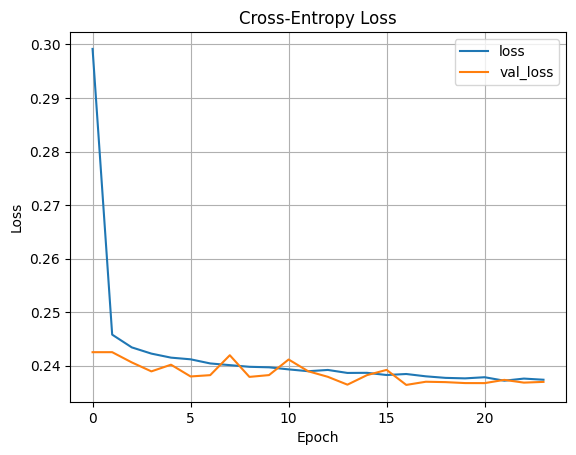

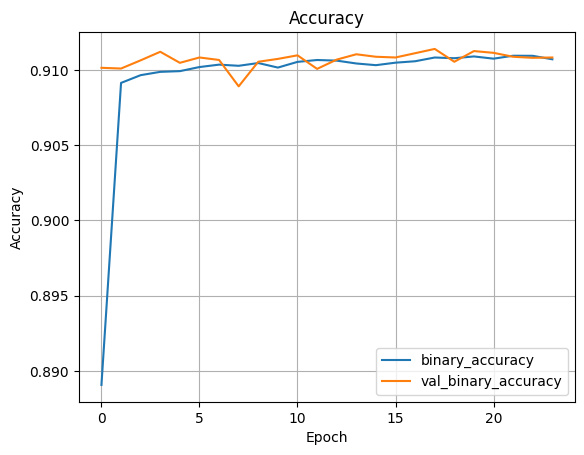

In [20]:
#compare the model loss against the actual val_loss
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(title="Cross-Entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#compare the model accuracy against the actual val accuracy
history_df[['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

2829/2829 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step


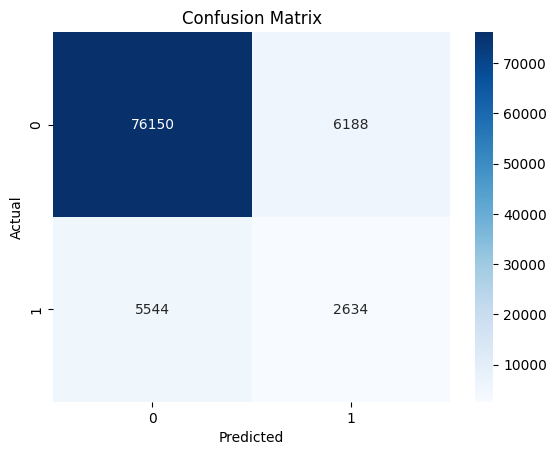

In [21]:
# Confusion matrix 
y_pred = model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = metrics.confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Calculate performance metrics
acc = metrics.accuracy_score(y_test, y_pred_labels)
prec = metrics.precision_score(y_test, y_pred_labels)
rec = metrics.recall_score(y_test, y_pred_labels)
f1 = metrics.f1_score(y_test, y_pred_labels)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8704
Precision: 0.2986
Recall: 0.3221
F1 Score: 0.3099


In [24]:
# test evaluate
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

2829/2829 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - binary_accuracy: 0.8721 - loss: 0.6522
Test Accuracy: 0.8704, Test Loss: 0.6571
